# Practice notebook for hypothesis tests using NHANES data

This notebook will give you the opportunity to perform some hypothesis tests with the NHANES data that are similar to
what was done in the week 3 case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import scipy.stats.distributions as dist
import math

In [115]:
da = pd.read_csv("nhanes_2015_2016.csv")

In [116]:
# Prepare data
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan}) 
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})

## Question 1

Conduct a hypothesis test (at the 0.05 level) for the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke.

In [16]:
df = da[['RIAGENDRx','SMQ020x']]
female = df[da.RIAGENDRx == 'Female'].dropna()
male = df[da.RIAGENDRx == 'Male'].dropna()

# Sample sizes
nf = len(female)
nm = len(male)

# Number of Smokers
yf = len(female[female.SMQ020x == 'Yes'])
ym = len(male[male.SMQ020x == 'Yes'])

# Estimates of the population proportions
pf = (female.SMQ020x == 'Yes').mean()
pm = (male.SMQ020x == 'Yes').mean()

# Standard Error
sef = np.sqrt(pf * (1 - pf) / nf)
sem = np.sqrt(pm * (1 - pm) / nm)

# Estimate of the combined population proportion
phat = (yf + ym) / (nf + nm)

# Estimate of the variance of the combined population proportion
va = phat * (1 - phat)

# Estimate of the standard error of the combined population proportion
se = np.sqrt(va * (1 / nf + 1 / nm))

# Test statistic and its p-value
test_stat = (pf - pm) / se
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))

# Print the test statistic its p-value
print("Test Statistic")
print(round(test_stat, 2))

print("\nP-Value")
print(round(pvalue, 2))

print("\nProportions")
print("F:",round(pf,3), "M:",round(pm,3))

Test Statistic
-16.05

P-Value
0.0

Proportions
F: 0.305 M: 0.513


__Q1a.__ Write 1-2 sentences explaining the substance of your findings to someone who does not know anything about statistical hypothesis tests.

There is significant evidence that the proportion of female smokers is different than the proportion of male smokers in the total population. Reviewing the proportions themselves reveals it is likely there are more male smokers than female smokers.

__Q1b.__ Construct three 95% confidence intervals: one for the proportion of women who smoke, one for the proportion of men who smoke, and one for the difference in the rates of smoking between women and men.

In [18]:
zstar = 1.96

# Female
lcb_f = pf - zstar * sef
ucb_f = pf + zstar * sef
print("F:", lcb_f, ",", ucb_f)

# Male
lcb_m = pm - zstar * sem
ucb_m = pm + zstar * sem
print("\nM:", lcb_m, ",", ucb_m)


F: 0.288294683866098 , 0.32139576027925865

M: 0.49458714955108174 , 0.531929377873546


__Q1c.__ Comment on any ways in which the confidence intervals that you found in part b reinforce, contradict, or add support to the hypothesis test conducted in part a.

The confidence intervals do not overlap, supporting the result that these proportions are different.

## Question 2

Partition the population into two groups based on whether a person has graduated college or not, using the educational attainment variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).  Then conduct a test of the null hypothesis that the average heights (in centimeters) of the two groups are equal.  Next, convert the heights from centimeters to inches, and conduct a test of the null hypothesis that the average heights (in inches) of the two groups are equal.

In [42]:
da['BMXHT_in'] = da['BMXHT']/2.54
college = da.query('DMDEDUC2x == "College"')[['BMXHT','BMXHT_in']].dropna()
nocollege = da.query('DMDEDUC2x != "College"')[['BMXHT','BMXHT_in']].dropna()

n1 = len(college)
mu1 = college["BMXHT"].mean()
sd1 = college["BMXHT"].std()
print("College:", n1, round(mu1,3), round(sd1,3))

n2 = len(nocollege)
mu2 = nocollege["BMXHT"].mean()
sd2 = nocollege["BMXHT"].std()
print("\nNo College:", n2, round(mu2,3), round(sd2,3))

# Difference is significant - small pvalue
print("\nTest:",sm.stats.ztest(college["BMXHT"].dropna(), nocollege["BMXHT"].dropna()))


College: 1355 167.855 9.705

No College: 4318 165.605 10.135

Test: (7.2007656698012505, 5.987537169067422e-13)


__Q2a.__ Based on the analysis performed here, are you confident that people who graduated from college have a different average height compared to people who did not graduate from college?

Yes the large test statistic and low p-value indicate that height defers between people who graduated college and those that didn't. Comparing the means of the two populations, however, suggest that the difference is likely not large in practicality. There may be underlying factors not accounted for in this analysis (like the gender breakdown of each population) that may explain this result. 

__Q2b:__ How do the results obtained using the heights expressed in inches compare to the results obtained using the heights expressed in centimeters?

In [43]:
print("\nTest in cm:",sm.stats.ztest(college["BMXHT"].dropna(), nocollege["BMXHT"].dropna()))
print("\nTest in in:",sm.stats.ztest(college["BMXHT_in"].dropna(), nocollege["BMXHT_in"].dropna()))


Test in cm: (7.2007656698012505, 5.987537169067422e-13)

Test in in: (7.200765669801254, 5.987537169067249e-13)


They are the same.

## Question 3

Conduct a hypothesis test of the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60.  Then carry out this test again after log transforming the BMI values.

In [124]:
m_3040 = da.query('RIAGENDRx == "Male" & RIDAGEYR >= 30 & RIDAGEYR <= 40')
m_5060 = da.query('RIAGENDRx == "Male" & RIDAGEYR >= 50 & RIDAGEYR <= 60')

n1 = len(m_3040)
mu1 = m_3040["BMXBMI"].mean()
sd1 = m_3040["BMXBMI"].std()
print("Men 30-40:", n1, round(mu1,3), round(sd1,3))

n2 = len(m_5060)
mu2 = m_5060["BMXBMI"].mean()
sd2 = m_5060["BMXBMI"].std()
print("\nMen 50-60:", n2, round(mu2,3), round(sd2,3))

# Difference is not significant - large pvalue
print("\nTest:",sm.stats.ztest(m_3040["BMXBMI"].dropna(), m_5060["BMXBMI"].dropna()))

# Log transformation
print("\nTest (ln):",sm.stats.ztest(np.log(m_3040.BMXBMI).dropna(), np.log(m_5060.BMXBMI).dropna()))


Men 30-40: 494 29.614 6.657

Men 50-60: 495 29.25 6.003

Test: (0.8984008016755222, 0.36897190924214873)

Test (ln): (0.7057844184100666, 0.4803222133688403)


__Q3a.__ How would you characterize the evidence that mean BMI differs between these age bands, and how would you characterize the evidence that mean log BMI differs between these age bands?

No, the small test statistic and large p-value indicate that we cannot reject the null hypothesis. Therefore, it is likely the means between men of these two different age groups are not different.

The log BMI makes the t-stat larger, providing stronger evidence in favor of no difference between age groups.

## Question 4

Suppose we wish to compare the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40.  First, consider the variance of BMI within each of these subpopulations using graphical techniques, and through the estimated subpopulation variances.  Then, calculate pooled and unpooled estimates of the standard error for the difference between the mean BMI in the two populations being compared.  Finally, test the null hypothesis that the two population means are equal, using each of the two different standard errors.

In [55]:
# Prepare data
df = da.query('RIAGENDRx == "Female" & RIDAGEYR >= 30 & RIDAGEYR <= 40')[['BMXBMI','DMDEDUC2x']]
df["College"] = da.DMDEDUC2x.replace({"<9":'No', "9-11":'No', "HS/GED":'No', "Some college/AA":'No',"College":'Yes', 
                                       "Refused":np.nan, "Don't know":np.nan})

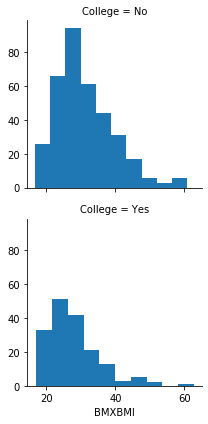

In [56]:
# Look at variance

## Histogram
g = sns.FacetGrid(df, row = "College") # set up grid
g = g.map(plt.hist, "BMXBMI") # what to plot within grid
plt.show()

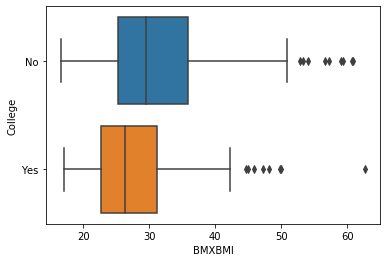

In [57]:
## Box Plot
sns.boxplot(x = df["BMXBMI"], y = df["College"])
plt.show()

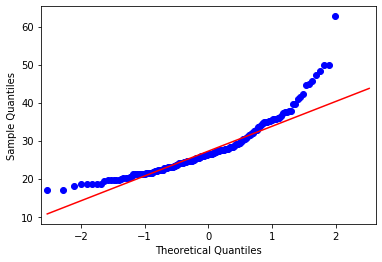

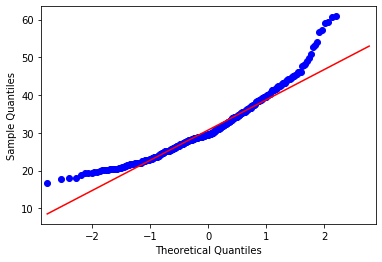

In [68]:
## QQ Plot
sm.qqplot(df.loc[df.College == 'Yes', "BMXBMI"],line= 'q')
sm.qqplot(df.loc[df.College == 'No', "BMXBMI"], line= 'q')
plt.show()

In [76]:
# Calculate Variances of each population
print("College Variance:",np.var(df.loc[df.College == 'Yes', "BMXBMI"]))
print("\nNon College Variance:",np.var(df.loc[df.College == 'No', "BMXBMI"]))

College Variance: 53.82741835094558

Non College Variance: 67.97035566088928


In [111]:
# Divide samples
c = df.loc[df.College == "Yes",'BMXBMI'].dropna()
nc = df.loc[df.College == "No",'BMXBMI'].dropna()

# Calc n, mu, and sd for future calcs
n_c = len(c)
n_nc = len(nc)

mu_c = c.mean()
mu_nc = nc.mean()
mu_diff = mu_c - mu_nc

sd_c = c.std()
sd_nc = nc.std()

print("STD of each population:",sd_c,sd_nc)

# SE for difference in means
## Pooled
sep = np.sqrt(((n_c - 1) * sd_c**2 + (n_nc - 1) * sd_nc**2) / (n_c + n_nc - 2)) * np.sqrt(1/n_c + 1/n_nc)

## Unpooled
seu = np.sqrt(sd_c**2/n_c + sd_nc**2/n_nc)

# Test null hypo that mean difference is o
## Pooled
tstatp = mu_diff / sep
pvalp = 2*dist.norm.cdf(-np.abs(tstatp))
print("\nPooled:", tstatp,pvalp)

## Unpooled
tstatu = mu_diff / seu
pvalu = 2*dist.norm.cdf(-np.abs(tstatu))
print("\nUnpooled:", tstatu,pvalu)

STD of each population: 7.358264076777769 8.256082984290918

Pooled: -4.643908450956404 3.4187910067120066e-06

Unpooled: -4.833662355599082 1.3404386169205152e-06


__Q4a.__ Comment on the strength of evidence against the null hypothesis that these two populations have equal mean BMI.

Both versions of the test support the rejection of the null hypothesis. These two populations have different average BMIs.

__Q4b.__ Comment on the degree to which the two populations have different variances, and on the extent to which the results using different approaches to estimating the standard error of the mean difference give divergent results.

Because the non-college population has greater variance than the college population, the unpooled test is more appropriate.

## Question 5

Conduct a test of the null hypothesis that the first and second diastolic blood pressure measurements within a subject have the same mean values.

In [147]:
# Population Mean Difference - Paired Data
dp = da[['BPXDI1', 'BPXDI2']].dropna()

# Calc Difference
dp.loc[:,'diff'] = da.BPXDI1 - da.BPXDI2

# Get mean & std & n
xbar = dp['diff'].mean()
sd = dp['diff'].std()
n = len(dp)

# Run Test
tstat = xbar / (sd / np.sqrt(n))
pval = 2*dist.norm.cdf(-np.abs(tstat))

(tstat,pval)

(4.140387087476657, 3.4672024397449396e-05)

__Q5a.__ Briefly describe your findings for an audience that is not familiar with statistical hypothesis testing.

We ran a statistical test to determine if the difference between the first and second measure of diastolic blood pressure is statistically significant. Our results show a large test statistic and low p-value, indicating that it is very unlikely that this sample data would appear under the assumption that there is no difference between these two measures. The evidence supports the rejection of this null hypothesis. The two measures are likely different.

__Q5b.__ Pretend that the first and second diastolic blood pressure measurements were taken on different people.  Modfify the analysis above as appropriate for this setting.

In [148]:
# Calc n, mu, and sd for future calcs
n1 = len(dp.BPXDI1)
n2 = len(dp.BPXDI2)

mu1 = dp.BPXDI1.mean()
mu2 = dp.BPXDI2.mean()
mu_diff = mu1 - mu2

sd1 = dp.BPXDI1.std()
sd2 = dp.BPXDI2.std()

## very similar - can use pooled approach
print("STD of each population:",sd1,sd2) 

STD of each population: 12.849040103962954 12.879691357993343


In [149]:
# SE for difference in means
## Pooled
sep = np.sqrt(((n_c - 1) * sd_c**2 + (n_nc - 1) * sd_nc**2) / (n_c + n_nc - 2)) * np.sqrt(1/n_c + 1/n_nc)

# Test null hypo that mean difference is o
## Pooled
tstatp = mu_diff / sep
pvalp = 2*dist.norm.cdf(-np.abs(tstatp))
print("\nPooled:", tstatp,pvalp)


Pooled: 0.46994475431133226 0.6383944883957321


__Q5c.__ Briefly describe how the approaches used and the results obtained in the preceeding two parts of the question differ.

When the two measures are treated as coming from different people, the results do not indicate a significant difference. The variance across people in the sample for each measure is folded into this analysis. The mean across the sample of each measure, therefore, is similar.

Paired data, however, compares each measure within a single subject. This controls for a lot of factors that may result in variance across a population. Therefore, differences between measures in the same person are more directly measured and not obsficated by the entire sample's variance.